#<h1><b aling = 'center'> Transformada Discreta de Fourier en Python

<p align = "justify">Este cuaderno tiene como objetivo mostrar la implementación de la transformada de Fourier para señales de tiempo discreto mediante diferentes algoritmos.

#<h1><b aling = 'center'>De la serie a la transformada </b>

<p align = "justify"> Considere una señal de tiempo discreto $x[n]$ de periodo $N$ la cual tiene representación mediante la serie de Fourier tal que:

\begin{equation}
x[n] = \sum_{k=0}^{N-1} c[k]~e^{j2\pi n \frac{k}{N}}
\end{equation}

<p align = "justify"> donde $c[k]$ es un número complejo que pondera (y desfasa) la contribución de la base k-ésima dada por:

\begin{equation}
c[k] = \frac{1}{N}\sum_{n=0}^{N-1} x[n] e^{-j2\pi n \frac{k}{N}}
\end{equation}


<p align = "justify"> Por lo tanto, la representación de $x[n]$ puede escribirse como:

\begin{split}
x[n] =& \sum_{k=0}^{N-1} \left(\frac{1}{N}\sum_{n=0}^{N-1} x[n'] e^{-j2\pi n' \frac{k}{N}} \right)~e^{j2\pi n \frac{k}{N}}\\
=& \frac{1}{N}\sum_{k=0}^{N-1} \left(\sum_{n=0}^{N-1} x[n'] e^{-j2\pi n' \frac{k}{N}} \right)~e^{j2\pi n \frac{k}{N}}\\
=& \frac{1}{N}\sum_{k=0}^{N-1} F_k ~e^{j2\pi n \frac{k}{N}}
\end{split}

donde

\begin{equation}
F_k = \sum_{n=0}^{N-1} x[n] e^{-j2\pi n \frac{k}{N}}
\end{equation}

<p align = "justify">corresponde a la transformada discreta de Fourier.

#<h1><b aling = 'center'>Transformada de Fourier como transformación lineal </b>

<p align = "justify"> Considere ahora el cálculo de cada coeficiente $F_k$ de manera independiente:

\begin{equation}
    \begin{split}
        F_0 = x[0] e^{-j2\pi 0 \frac{0}{N}} + x[1] e^{-j2\pi 1 \frac{0}{N}} + ... + x[N-1] e^{-j2\pi (N-1) \frac{0}{N}}\\
        F_1 = x[0] e^{-j2\pi 0 \frac{1}{N}} + x[1] e^{-j2\pi 1 \frac{1}{N}} + ... + x[N-1] e^{-j2\pi (N-1) \frac{1}{N}}\\
        \vdots\\
        F_{N-1} = x[0] e^{-j2\pi 0 \frac{N-1}{N}} + x[1] e^{-j2\pi 1 \frac{N-1}{N}} + ... + x[N-1] e^{-j2\pi (N-1) \frac{N-1}{N}}
    \end{split}
\end{equation}

<p align = "justify"> Observe que resulta en un cojunto lineal de $N$ ecuaciones con $N$ incognitas (una para cada $F_k$). Lo anterior puede ser expresado de forma matricial como:

\begin{equation}
    \begin{bmatrix}
    F_0\\
    F_1\\
    \vdots\\
    F_{N-1}
    \end{bmatrix} =
    \begin{bmatrix}
    1 & 1 & \cdots & 1\\
    1 & e^{-j2\pi 1 \frac{1}{N}} & \cdots & e^{-j2\pi (N-1) \frac{1}{N}}\\
    \vdots & \vdots & \ddots & \vdots\\
    1 & e^{-j2\pi 1 \frac{(N-1)}{N}} & \cdots & e^{-j2\pi (N-1) \frac{(N-1)}{N}}\end{bmatrix}
    \begin{bmatrix}
    x[0]\\
    x[1]\\
    \vdots\\
    x[N-1]
    \end{bmatrix}
\end{equation}

donde los elementos de la primera fila y primera columna de la matriz anterior son $1$ debido al exponente $0$ en la función base presente en todos los términos de la primera ecuación y el primer término de las demás ecuaciones. Note que la matriz anterior es una de transformación de la señal de tiempo discreto $x[n]$ a los coeficientes $F_k$ (que resulta también en una representación discreta).

<p align = "justify">Sea $W = e^{-j2\pi\frac{1}{N}}$

\begin{equation}
\begin{bmatrix}
    F_0\\
    F_1\\
    \vdots\\
    F_{N-1}
    \end{bmatrix} =
    \begin{bmatrix}
    1 & 1 & \cdots & 1\\
    1 & W^{1\cdot 1} & \cdots & W^{(N-1)\cdot 1}\\
    \vdots & \vdots & \ddots & \vdots\\
    1 & W^{1\cdot (N-1)} & \cdots & W^{(N-1)\cdot (N-1)}\end{bmatrix}
    \begin{bmatrix}
    x[0]\\
    x[1]\\
    \vdots\\
    x[N-1]
    \end{bmatrix}
\end{equation}

<p align = "justify">ahora el exponente de cada $W$ corresponde al producto de sus índices dentro de la matriz de transformación. Por lo tanto, el cálculo de los coeficientes $F_k$ se resume en un producto matriz-vector y en la construcción de la matriz de transformación. Note que la matriz es simétrica y que los elementos de la primera fila y primera columna son dados (valen $1$). Luego, solo es necesario calcular $N(N-1)/2$ términos.

#<h1><b aling = 'center'> Generar datos sintéticos </b>

<p align = "justify"> Para observar el funcionamiento de los algoritmos desarrollados, se propone la siguiente señal de pureba:

\begin{equation}
    x(t) = 3 \sin(2\pi t) + 2 \sin(4\pi t) + 5 \cos(4\pi t) - 8 \sin(5\pi t)
\end{equation}

<p align = "justify"> Observe que  existen componentes de frecuencia en 3 bandas diferentes y que la componente de menor frecuencia no es múltiplo de la componente de mayor frecuencia.

<p align = "justify"> Para discretizar la señal, se realiza un muestreo uniforme con una frecuencia de muestreo de $8$ y $4096 Hz$ en el intervalo $t \in [0, 2)$ de tal forma que se capture 1 periodo fundamental. De esta manera se obtiene dos señales de prueba, la primera de 16 muestras y la segunda de 8192 muestas.

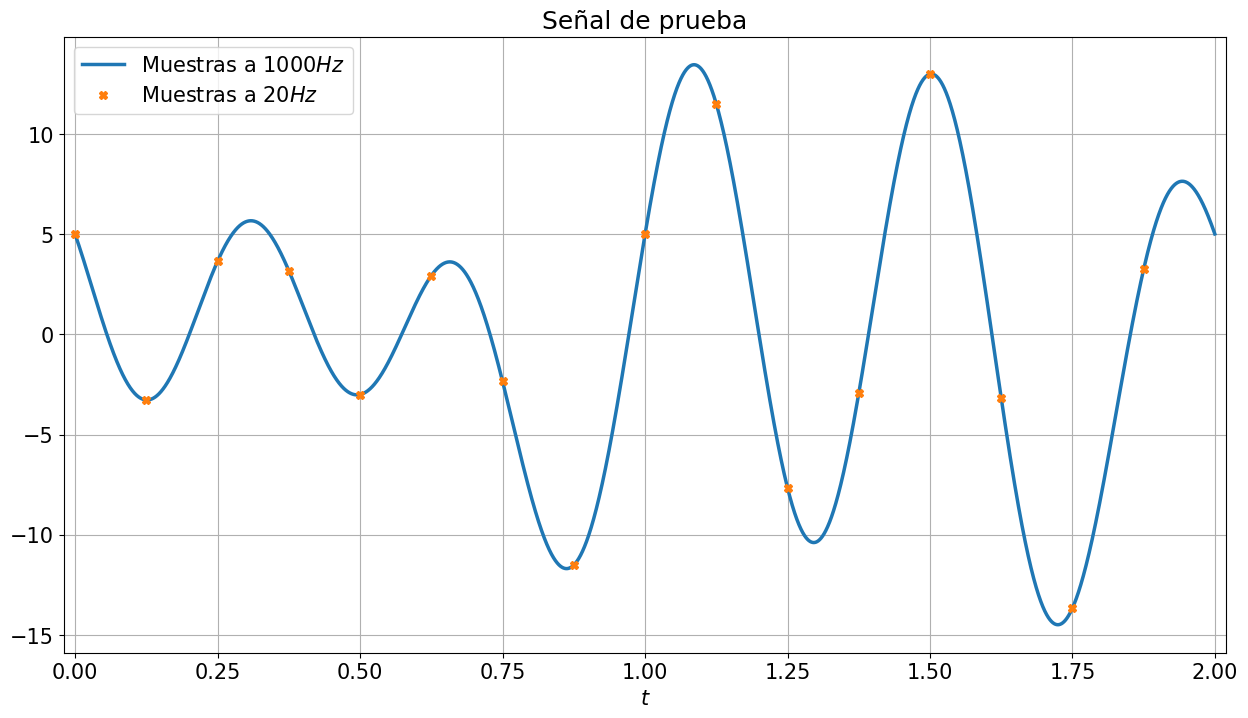

Muestras de la primera señal de prueba: 16 Muestras de la segunda señal de prueba: 8192


In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams.update(
    {
        "figure.figsize": (15, 8),
        "lines.linewidth": 2.5,
        "font.size": 15,
        "axes.xmargin": 1e-2,
        "axes.grid": True,
    }
)

def gen_data(Fs):
    t = np.arange(0, 2, 1/Fs)
    x = 3 * np.sin(2 * np.pi * t) \
        + 2 * np.sin(4 * np.pi * t) \
        + 5 * np.cos(4 * np.pi * t) \
        - 8 * np.sin(5 * np.pi * t)

    return x, t

# Primera señal de prueba
x1, t1 = gen_data(8)
# Segunda señal de prueba
x2, t2 = gen_data(4096)

plt.plot(t2, x2, label="Muestras a $1000 Hz$")
plt.plot(t1, x1, "X", label="Muestras a $20 Hz$")
plt.xlabel("$t$")
plt.title("Señal de prueba")
plt.legend()
plt.show()

print(f"Muestras de la primera señal de prueba: {len(x1)}", f"Muestras de la segunda señal de prueba: {len(x2)}")

<p align = "justify">Se crean algunas funciones útiles para graficar.

In [2]:
def plot_dft(dft_function, x_data):
    F = dft_function(x_data)
    _, ax = plt.subplots(2, 1)
    ax[0].stem(np.abs(F))
    ax[0].set_title("Espectro de magnitud")
    ax[0].set_xticklabels([])
    ax[1].stem(np.angle(F))
    ax[1].set_yticks(
        np.arange(np.pi, -np.pi, -np.pi/2),
        ["π", "π/2", "0", "-π/2"]
    )
    ax[1].set_title("Espectro de fase")
    ax[1].set_xlabel("k")
    plt.show()


#<h1><b aling = 'center'> Implementación mediante la matriz de transformación  </b>

<p align = "justify">Los siguientes ejemplos muestran diferentes formas de desarrolar la transformada discreta de Fourier utilizando la matriz de tranformación expuesta anteriormente.

## Implementación a pedal

<p align = "justify">En este caso se crea una matriz vacia en la cuál cada uno de sus elementos será asignado implicitamente.

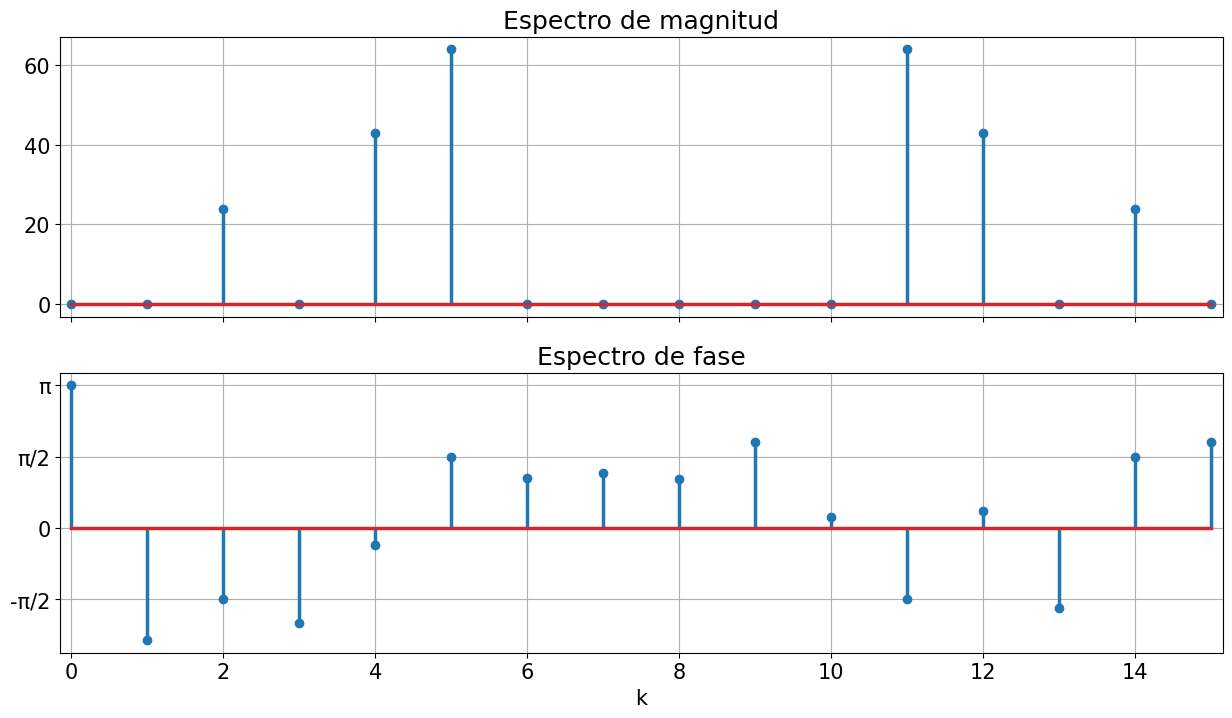

In [3]:
def dft_pedal(x):
    # Se toma el número de muestras de la señal
    N = len(x)
    # Matrix de tranformación de tipo compleja
    M = np.empty((N, N), dtype=complex)
    # Inicializo en 1 los elementos de la primera
    # fila y primera columna
    M[0, :], M[1:, 0]  = 1, 1
    # Se declara la constante W
    W = np.exp(-2j * np.pi / N)
    # Empieza a llenar la matriz
    for k in range(1, N):
        # Elemento en la diagonal
        M[k, k] = W ** (k ** 2)
        for n in range(k+1, N):
            # Elementos fuera de la diagonal
            M[k, n] = W ** (k * n)
            # Aprovecho la simetria de la matriz
            M[n, k] = M[k, n]

    # Calculo los coeficientes como el producto matriz-vector
    F = M @ x
    return F

plot_dft(dft_pedal, x1)

## Implementación utilizando la matriz pre-calculada

Ahora se hace uso de la función ``` dft ``` de la libreria ``` scipy ``` para calcular directamete la matriz de tranformación. Esto tiene como ventajas utilizar menos líneas de código, no utilizar ciclos ```for``` implicitos e implementar la vectorización para realizar cálculos más rápidos.





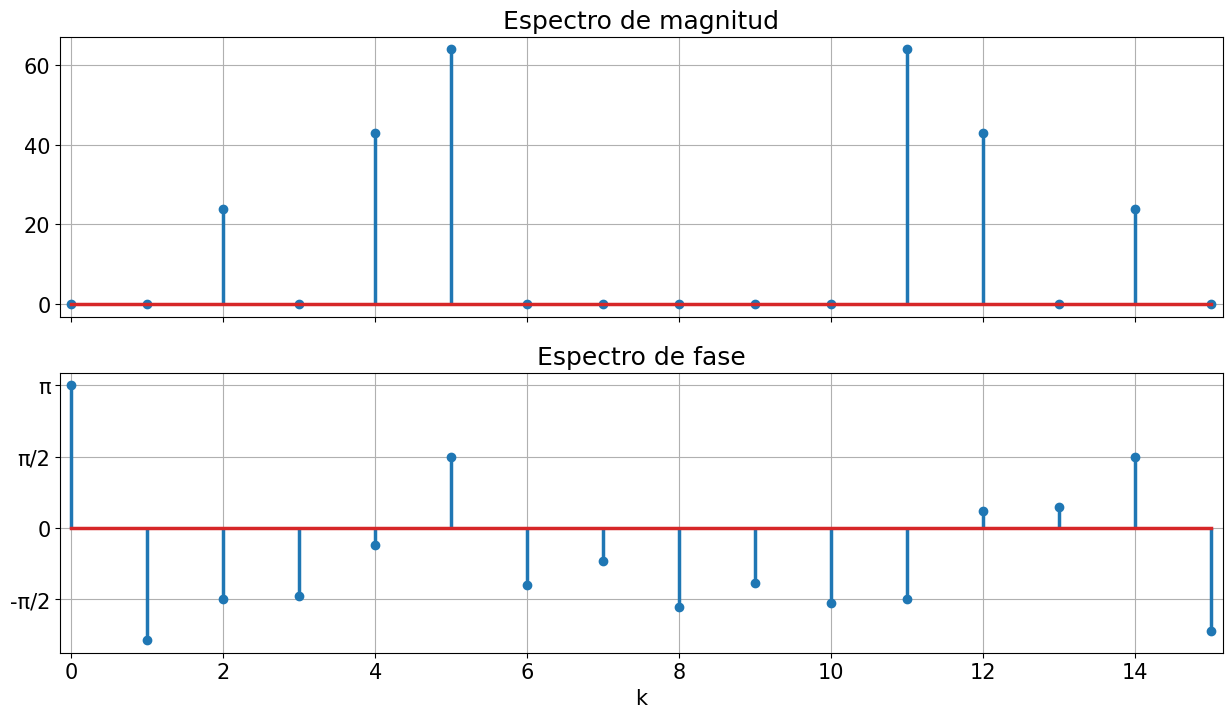

In [4]:
from scipy.linalg import dft

def dft_pre(x):
    # Se toma el número de muestras de la señal
    N = len(x)
    # Se construye la matriz de transformación
    # haciendo uso de la función dft que solo recive
    # como parámetro el número de muestras.
    M = dft(N)
    # Calculo los coeficientes como el producto matriz-vector
    F = M @ x
    return F

plot_dft(dft_pre, x1)

#<h1><b aling = 'center'> Implementación mediante el algoritmo FFT (Fast Fourier Transform)  </b>

<p align = "justify">El siguiente algoritmo busca aprovechar las simetrias presentes en la transformada discreta de Fourier. Sea $F_k^x$ el coeficiente $k$-ésimo de la tranformada de Fourier de la señal $x$. La idea es dividir la serie en índices pares e impares, como se muestra a conticuación:

\begin{equation}
    \begin{split}
    F_k^x &= \sum_{n=0}^{N-1} x[n] e^{-j2\pi n \frac{k}{N}}\\
    &= \sum_{n=0}^{N/2-1} x[2n] e^{-j2\pi (2n) \frac{k}{N}} + \sum_{n=0}^{N/2-1} x[2n+1] e^{-j2\pi (2n+1) \frac{k}{N}}\\
    &= \sum_{n=0}^{N/2-1} x[2n] e^{-j2\pi n \frac{k}{N/2}} + e^{-j2\pi \frac{k}{N}}\sum_{n=0}^{N/2-1} x[2n+1] e^{-j2\pi n \frac{k}{N/2}}\\
    &= F_k^{x_{par}} + e^{-j2\pi \frac{k}{N}} F_k^{x_{impar}} \\
     &= F_k^{x_{par}} + W^k F_k^{x_{impar}}
    \end{split}
\end{equation}

<p align = "justify">donde $x_{par} = x[2n]$ y $x_{impar} = x[2n+1]$. Note que ahora en lugar de trabajar con las $N$ muestras $x$ directamente, se utilizan $N/2$ muestras para calcular los coeficientes de $x_{par}$, y otras $N/2$ muestras para calcular los coeficientes de $x_{impar}$, los cuales son desfasados $k/N$ radianes. La ventaja aqui es en que este proceso de dividir una secuencia de muestras en sus índices pares e impares se puede repetir recursivamente hasta trabajar solo con una muestra, el cuál resulta en un caso trivial debido a que esta corresponde a su único coeficiente. Más especificamente, una señal de tiempo discreto de tamaño $N$ puede ser dividida en índices pares e impares de forma recursiva un número de $\log_2(N)$ veces. Debido a que este número debe ser entero, impone una restricción sobre la secuencia; esta debe ser de un tamaño igual a una potencia de 2.

<p align = "justify">Otra propiedad que puese ser explotada en este algoritmo es la siguiente:

\begin{equation}
F_{k+N/2}^x = \sum_{n=0}^{N-1} x[n] e^{-j2\pi n \frac{k}{N}} (-1)^n
\end{equation}

<p align = "justify"> para lo cual, si el índice de la muestra es par, el término de la sumatoria no cambia, mientras que si es impar, tomará el signo contrario. Dado que el algoritmo expuesto presisamente divide la secuencia en índices pares e impares, se obtiene la sigueinte relación:

\begin{equation}
F_{k+N/2}^x = F_k^{x_{par}} - W^k F_k^{x_{impar}}
\end{equation}

<p align = "justify"> por lo tanto, los terminos para cálcular los primeros $N/2$ coeficientes, pueden ser utilizados para calcular los últimos $N/2$ coeficientes.


## Implementación a pedal

<p align = "justify">En la siguiente implementación todas las operaciones desarrolladas anteriormente se exponen de forma implicita.

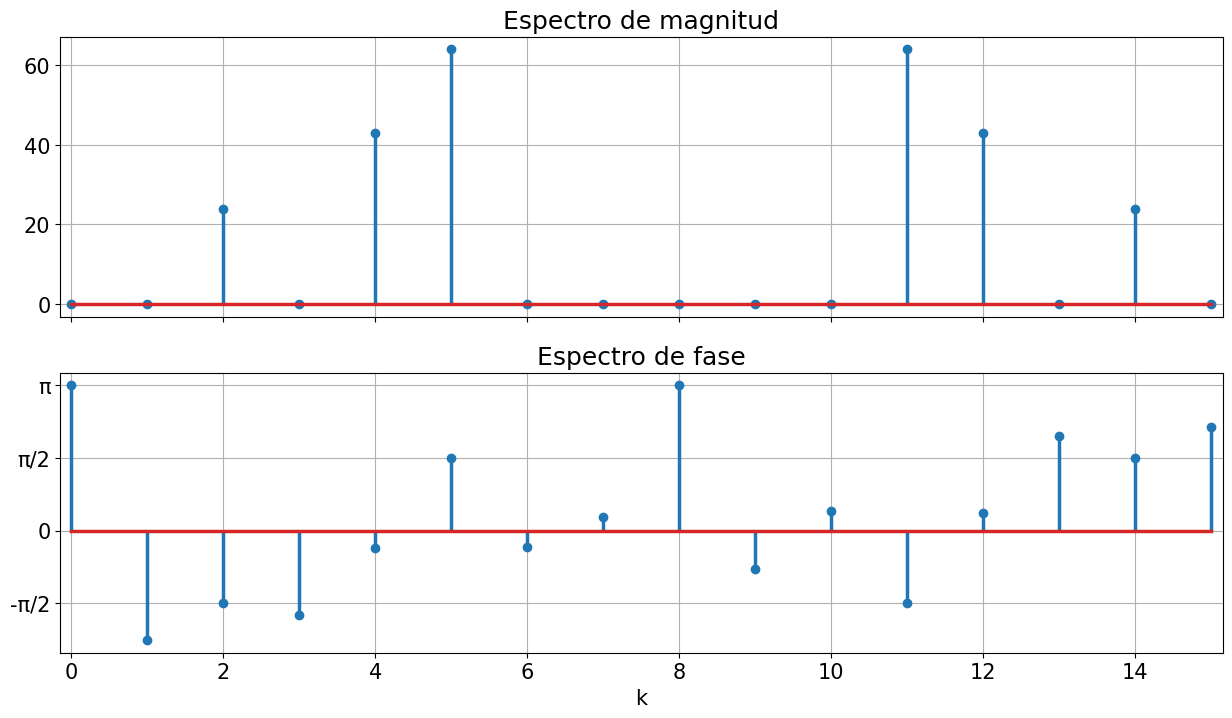

In [5]:
def fft_pedal(x):
    # Se toma el número de muestras de la señal
    N = len(x)
    # Si solo hay un elemento en la secuenci
    # se llega al caso trivial
    if N == 1:
        F = x
    # Si hay más de un elemento, se procede con
    # la división en índices pares e impares
    # hasta que la secuencia solo tenga una muestra
    else:
        # Se crea un contenedor de números complejos
        # vacío
        F = np.empty(N, dtype=complex)
        # Se declara la constante W
        W = np.exp(-2j * np.pi / N)
        # Cálculo de los coeficientes para índices
        # pares e impares
        F_even = fft_pedal(x[::2])
        F_odd = fft_pedal(x[1::2])

        # Se reconstruyen los coeficientes a partir
        # de los cálculos anteriores
        for k in range(N//2):
            F[k] = F_even[k] + W ** k * F_odd[k]
            F[k+N//2] = F_even[k] - W ** k * F_odd[k]

    return F

plot_dft(fft_pedal, x1)

## Implementación  mediante función pre-programada

Nuevamente la libreria ```scipy``` ofrece una función llamda  ```fft``` que implementa el algoritmo descrito con las ventajas de la vectorización para realizar cálculos más rápidos.



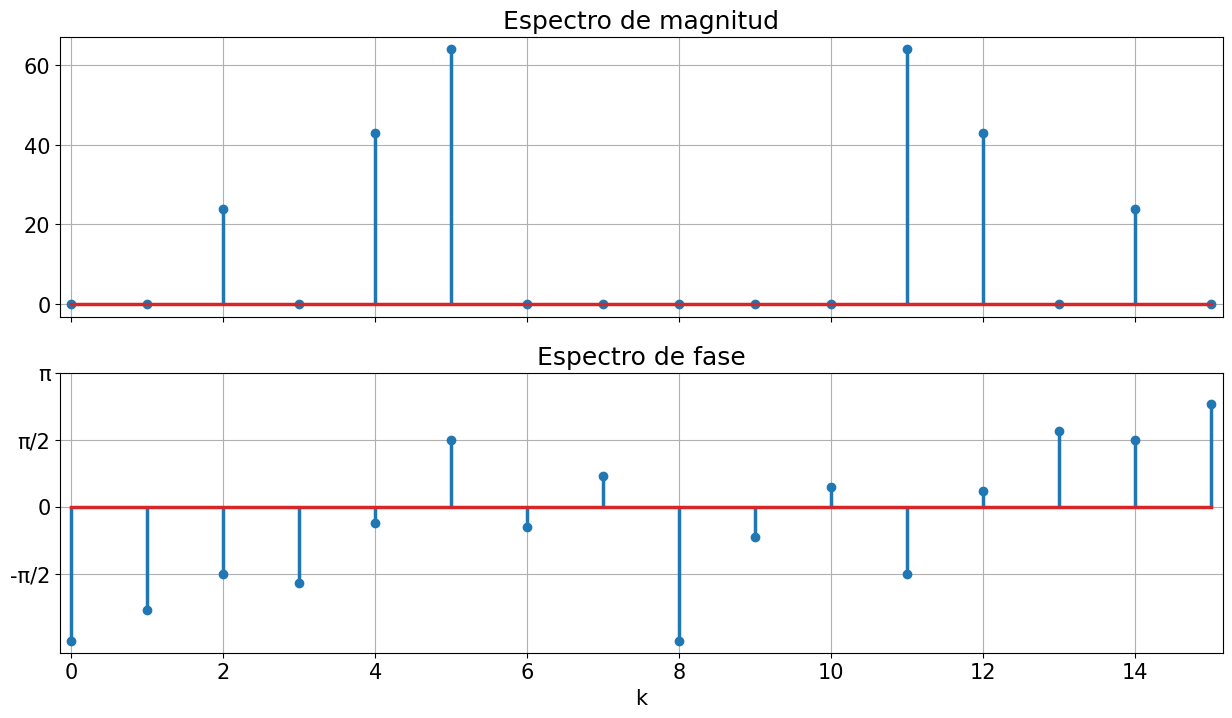

In [6]:
from scipy.fft import fft

plot_dft(fft, x1)

#<h1><b aling = 'center'>Complejidad temporal  </b>

<p align = "justify"> Se mencinó que la principal diferencia entre un algoritmo y otro radica en la rápidez con la que realiza los cálculos. Llamamos complejidad de un algoritmo al número de operaciones que necesita para realizar su tarea en función del tamaño de la entrada (el número de muestras $N$ en este caso).

<p align = "justify"> En las implementaciones anteriores, el uso de la matriz de transformación implica una complejidad $\mathcal{O}(N^2)$, debido a que por cada muestra nueva que se agregue, la matriz crece en una fila y una columna. Luego, el algoritmo de la fft presenta una complejidad de $\mathcal{O}(N \log_2 N)$ por su estrategia de dividir cada secuencia de tamaño $N$ a la mitad de forma recursiva. Para visualizar esto, se ejecutarán nuevamente las funciones para la transformada discreta de Fourier creadas y se tomará el tiempo que tardan en ejecutar secuencia de más muestras.

In [ ]:
import time

def time_dft(function_dft, x_data):
    start = time.time()
    function_dft(x_data)
    end = time.time()
    runtime = end - start
    return runtime

print(f"Matriz de transformación a pedal: {time_dft(dft_pedal, x2):.3f} s")
print(f"Matriz de transformación a pre-calculada: {time_dft(dft_pre, x2):.3f} s")
print(f"FFT a pedal: {time_dft(fft_pedal, x2):.3f} s")
print(f"FFT pre-programado: {time_dft(fft, x2)*1e3:.3f} ms")


Matriz de transformación a pedal: 50.919 s


El algoritmo de la fft puede ser simplificado aún más si se considera que la señal a evaluear es real. En este caso sólo la mitad de los coeficientes son cálculados (los primeros $N/2$). Para implementar la transformada rápida de Fourier asuimiendo señales reales, se hace uso de la función ```rfft``` de ```scipy```. A continuación se evalua el tiempo de ejecución de los algoritmos expuestos para señales con diferentes tamaños de muestran $N$. Lo anterior es ejecutado $10$ veces y promediado para una comparación más justa.



In [ ]:
from scipy.fft import rfft

functions = [dft_pedal, dft_pre, fft_pedal, fft, rfft]
n_samples = 10
sizes = [2**i for i in range(10)]
times = np.empty((len(functions), len(sizes), n_samples))

for j, n in enumerate(sizes):
    x = np.random.rand(n)

    for i, func in enumerate(functions):

        for n in range(n_samples):
            times[i, j, n] = time_dft(func, x)


plt.plot(sizes, times.mean(axis=2).T)
plt.legend([func.__name__ for func in functions])
plt.xlabel("Número de muestras $N$")
plt.ylabel("Tiempo $s$")
plt.show()

<p align = "justify"> De acuerdo con la figura anterior, el tiempo que tardan en calcular los coeficientes los algoritmos que hacen uso de la matriz de incidencia crece más rápido con el número de muestra que los que hacen uso del algoritmo de la fft. Ahora, de estos últimos los que implementan cálculos vectorzados muestran un mejor desempeño.

#<h1><b aling = 'center'>Uso de la FFT</b>

Para una mejor interpretación de los espectros de magnitud y fase, ```scipy.fft``` ofrece un conjunto de herramientas para facilitar la visualización de los coeficientes calculados. A continuación se grafica el espectro de magnitud de la primera señal de prueba.



In [ ]:
F = fft(x1)
_, ax = plt.subplots()
ax.stem(np.abs(F))
ax.set_title("Espectro de magnitud")
ax.set_xlabel("k")
plt.show()

De la señal de prueba se sabe que tiene componentes de frecuencia en $1$, $2$ y $2.5 HZ$. Sin embargo, resulta tedioso visualizarlos en la grafica anterior. Una primera mejora es graficar los espectros no con respecto a $k$ sino con respecto a la frecuencia continua $F$ dada en $Hz$. Recuerde que $k$ es múltiplo de una frecuencia discreta fundamental $1/N$ tal que la frecuencia discreta $f = k/N$. Luego, solo es necesario multiplicar por la frecuencia de muestreo para llevar los índices a la correspondiente frecuencia continua tal que:

\begin{equation}
    F = \frac{k}{N}F_s
\end{equation}

Ahora, recuede que por el teorema de Nyquist las componentes de frecuencia originales se encuentran en el intervalo $[-\frac{F_s}{2}, \frac{F_s}{2})$, pero como $k$ toma valores desde $0$ a $N-1$, la conversión anterior lleva a un intervalo de frecuencias continuas de $[0, F_s)$. En otras palabras, la segunda mitad de los coeficientes calculados correspondes a componentes de frecuencia alias. Para llevar nuevamente al rango de frecuencias original basta con transladar esta segunda mitad de los coeficietnes antes de la primera mitad. Por suerte,  ```scipy.fft``` cuenta con las funciones ```fftfreq``` y ```fftshift``` que realizan este trabajo automaticamente.







In [ ]:
from scipy.fft import fftfreq, fftshift

Fs = 8
F = fft(x1)
freqs = fftfreq(len(F), 1/Fs)
freqs_shift = fftshift(freqs)
F_shift = fftshift(F)

_, ax = plt.subplots()
ax.stem(freqs_shift, np.abs(F_shift))
ax.set_title("Espectro de magnitud")
ax.set_xlabel("F")
plt.show()

In [ ]:
Fs = 4096
F = fft(x2)
freqs = fftfreq(len(F), 1/Fs)
freqs_shift = fftshift(freqs)
F_shift = fftshift(F)

_, ax = plt.subplots()
ax.stem(freqs_shift, np.abs(F_shift))
ax.set_title("Espectro de magnitud")
ax.set_xlabel("F")
ax.set_xlim(-4, 3.5)
plt.show()

#<h1><b aling = 'center'>Obtención de los coeficientes $a_k$ y $b_k$ de la serie trigonimetrica de Fourier a partir de la fft</b>.

<p align = "justify"> Recuerde que los coeficientes de la serie compleja de Fourier se obtiene de los coeficientes de la transformada dividiendo esto últimos sobre el número de muestras:

\begin{equation}
    F_k = \frac{c_k}{N}
\end{equation}

Considere la ecuaión de sintesis de la serie discreta de Fourier

\begin{equation}
x[n] = \sum_{k=0}^{N-1} c_k~e^{j2\pi n \frac{k}{N}}
\end{equation}

Para $N$ par, los elementos $F[1]$ a $F[N/2-1]$ corresponde a componentes de frecuencia positiva y los elementos $F[N/2]$ a $F[N-1]$ a los de frecuencia negativa. Por otro lado, si $N$ es impar, los elementos $F[1]$ a $F[(N-1)/2]$ corresponde a componentes de frecuencia positiva y los elementos $F[(N+1)/2]$ a $F[N-1]$ a los de frecuencia negativa. $F[0]$ siempre corresponde a la componente de freciencia cero o DC. Ahora la idea es separar cada término en la ecuación de síntesis en componente de frecuencia DC, positiva y negativa.



*   Para $N$ par:

\begin{equation}
    \begin{split}
    x[n] &= \sum_{k=0}^{N-1} c_k~e^{j2\pi n \frac{k}{N}}\\
    &=c_0 + \sum_{k=1}^{N/2-1} c_k~e^{j2\pi n \frac{k}{N}} + \sum_{k=N/2}^{N-1} c_k~e^{j2\pi n \frac{k}{N}}
    \end{split}
\end{equation}

Sea $k' = k - N$. Con esto desplazamos un periodo los coeficientes negativos.

\begin{equation}
    \begin{split}
    x[n] &= c_0 + \sum_{k=1}^{N/2-1} c_k~e^{j2\pi n \frac{k}{N}} + \sum_{k'=-N/2}^{-1} c_{k'}~e^{j2\pi n \frac{k'}{N}}\\
    &= c_0 + \sum_{k=1}^{N/2-1} c_k~e^{j2\pi n \frac{k}{N}} + \sum_{-k'=-1}^{N/2} c_{-k'}~e^{-j2\pi n \frac{k'}{N}}\\
    &= c_0 + \sum_{k=1}^{N/2-1} \left( a_k~\cos\left(2\pi n \frac{k}{N}\right) + b_k~\sin\left(2\pi n \frac{k}{N}\right) \right) +c_{-N/2}(-1)^n
    \end{split}
\end{equation}

*   Para $N$ impar

\begin{equation}
    \begin{split}
    x[n] &= \sum_{k=0}^{N-1} c_k~e^{j2\pi n \frac{k}{N}}\\
    &=c_0 + \sum_{k=1}^{(N-2)/2} c_k~e^{j2\pi n \frac{k}{N}} + \sum_{k=(N+1)/2}^{N-1} c_k~e^{j2\pi n \frac{k}{N}}\\
    &= c_0 + \sum_{k=1}^{(N-1)/2} c_k~e^{j2\pi n \frac{k}{N}} + \sum_{k'=-(N-1)/2}^{-1} c_{k'}~e^{j2\pi n \frac{k'}{N}}\\
    &= c_0 + \sum_{k=1}^{N/2-1} c_k~e^{j2\pi n \frac{k}{N}} + \sum_{-k'=-1}^{(N-1)/2} c_{-k'}~e^{-j2\pi n \frac{k'}{N}}\\
    &= c_0 + \sum_{k=1}^{(N-1)/2} \left( a_k~\cos\left(2\pi n \frac{k}{N}\right) + b_k~\sin\left(2\pi n \frac{k}{N}\right) \right)
    \end{split}
\end{equation}

con

\begin{equation}
    \begin{split}
        a_k = c_k + c_{-k}\\
        b_k = j(c_k - c_{-k})
    \end{split}
\end{equation}

<p align = "justify">Note que sin importar si la señal es de tamaño par o impar, el cálculo de los coeficientes de la serier trigonimétrica de Fourier son los mismos. Sin embargo, cuando la señal es par, el coeficiente de la componente de menor frecuencia negativa $-N/2$ no se empareja con alguna componete positiva, por lo que a la hora de la reconstrucción de la señal, deberá agregarse a la ecuación de síntesis aparte. Adicionalmente, si la señal es real:

\begin{equation}
    \begin{split}
        a_k = 2 Real\{c_k\}\\
        b_k = -2 Imag\{c_k\}
    \end{split}
\end{equation}


<p align = "justify">Apliciando lo anteriro a la primera señal de prueba se obtienen los siguientes espectros.


In [ ]:
N = len(x1)
F = fft(x1)
ck = F / N
c0 = ck[0]
ak = 2 * ck[1:N//2-1].real
bk = -2 * ck[1:N//2-1].imag
Fs = 8
freqs = [k * Fs / N for k in range(1, N//2 - 1)]


_, ax = plt.subplots(2, 1)
ax[0].stem(freqs, ak)
ax[0].set_title("Espectros Trigonométricos")
ax[0].set_ylabel("$a_k$")

ax[1].stem(freqs, bk)
ax[1].set_ylabel("$b_k$")
ax[1].set_xlabel("F")
plt.show()